In [1]:
"""
Cell Types and Metadata in HNN-Core Networks
=============================================

This notebook talks about the concept of cell types and metadata in HNN-Core networks,
serving as a foundation for understanding network structure.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from hnn_core import jones_2009_model, simulate_dipole
from hnn_core.viz import plot_dipole

In [2]:
# Create the default Jones 2009 model
net = jones_2009_model()
print(f"Network created with {len(net.cell_types)} cell types")
print(f"Cell types: {list(net.cell_types.keys())}")

Network created with 4 cell types
Cell types: ['L2_basket', 'L2_pyramidal', 'L5_basket', 'L5_pyramidal']


In [3]:
# Each cell type in the network has associated metadata that describes its properties.
# Display metadata for all cell types
for cell_type_name, cell_type_data in net.cell_types.items():
    print(f"\n{cell_type_name}:")
    print("-" * 40)
    metadata = cell_type_data["cell_metadata"]
    for key, value in metadata.items():
        print(f"  {key}: {value}")


L2_basket:
----------------------------------------
  morpho_type: basket
  electro_type: inhibitory
  layer: 2
  measure_dipole: False
  reference: https://doi.org/10.7554/eLife.51214

L2_pyramidal:
----------------------------------------
  morpho_type: pyramidal
  electro_type: excitatory
  layer: 2
  measure_dipole: True
  reference: https://doi.org/10.7554/eLife.51214

L5_basket:
----------------------------------------
  morpho_type: basket
  electro_type: inhibitory
  layer: 5
  measure_dipole: False
  reference: https://doi.org/10.7554/eLife.51214

L5_pyramidal:
----------------------------------------
  morpho_type: pyramidal
  electro_type: excitatory
  layer: 5
  measure_dipole: True
  reference: https://doi.org/10.7554/eLife.51214


In [4]:
print("\n" + "="*60)
print("Using filter_cell_types() to find specific populations:")
print("-"*50)
# Example filters
excitatory = net.filter_cell_types(electro_type='excitatory')
print(f"Excitatory cells: {excitatory}")

layer2_cells = net.filter_cell_types(layer='2')
print(f"Layer 2 cells: {layer2_cells}")

dipole_contributors = net.filter_cell_types(measure_dipole=True)
print(f"Dipole contributors: {dipole_contributors}")


Using filter_cell_types() to find specific populations:
--------------------------------------------------
Excitatory cells: ['L2_pyramidal', 'L5_pyramidal']
Layer 2 cells: ['L2_basket', 'L2_pyramidal']
Dipole contributors: ['L2_pyramidal', 'L5_pyramidal']


In [5]:
# Accessing Proximal Connection Weights via Metadata
# We can use metadata filtering to examine specific connection weights.

# Find excitatory-to-excitatory proximal connections
excitatory_cells = net.filter_cell_types(electro_type='excitatory')

# Pick one example connection to demonstrate
src_example = 'L2_pyramidal'
target_example = 'L2_pyramidal'

print(f"Example: {src_example} → {target_example} proximal connections")
print("-"*60)

# Find this specific connection
for conn in net.connectivity:
    if (conn['src_type'] == src_example and 
        conn['target_type'] == target_example and 
        conn['loc'] == 'proximal'):
        
        weight = conn['nc_dict']['A_weight']
        gain = conn['nc_dict'].get('gain', 1.0)
        
        print(f"Receptor: {conn['receptor']}")
        print(f"  Base weight: {weight:.6f} µS")
        print(f"  Gain factor: {gain}")
        print(f"  Effective weight: {weight * gain:.6f} µS")
        print(f"  Delay: {conn['nc_dict']['A_delay']} ms")
        print(f"  Space constant: {conn['nc_dict']['lamtha']}")

Example: L2_pyramidal → L2_pyramidal proximal connections
------------------------------------------------------------
Receptor: nmda
  Base weight: 0.000500 µS
  Gain factor: 1.0
  Effective weight: 0.000500 µS
  Delay: 1.0 ms
  Space constant: 3.0
Receptor: ampa
  Base weight: 0.000500 µS
  Gain factor: 1.0
  Effective weight: 0.000500 µS
  Delay: 1.0 ms
  Space constant: 3.0


In [6]:
# Filter cells that contribute to the dipole
dipole_cells = net.filter_cell_types(measure_dipole=True)
non_dipole_cells = net.filter_cell_types(measure_dipole=False)

print("Cells contributing to dipole signal:")
for cell_type in dipole_cells:
    print(f"  - {cell_type}")

print("\nCells NOT contributing to dipole signal:")
for cell_type in non_dipole_cells:
    print(f"  - {cell_type}")

Cells contributing to dipole signal:
  - L2_pyramidal
  - L5_pyramidal

Cells NOT contributing to dipole signal:
  - L2_basket
  - L5_basket


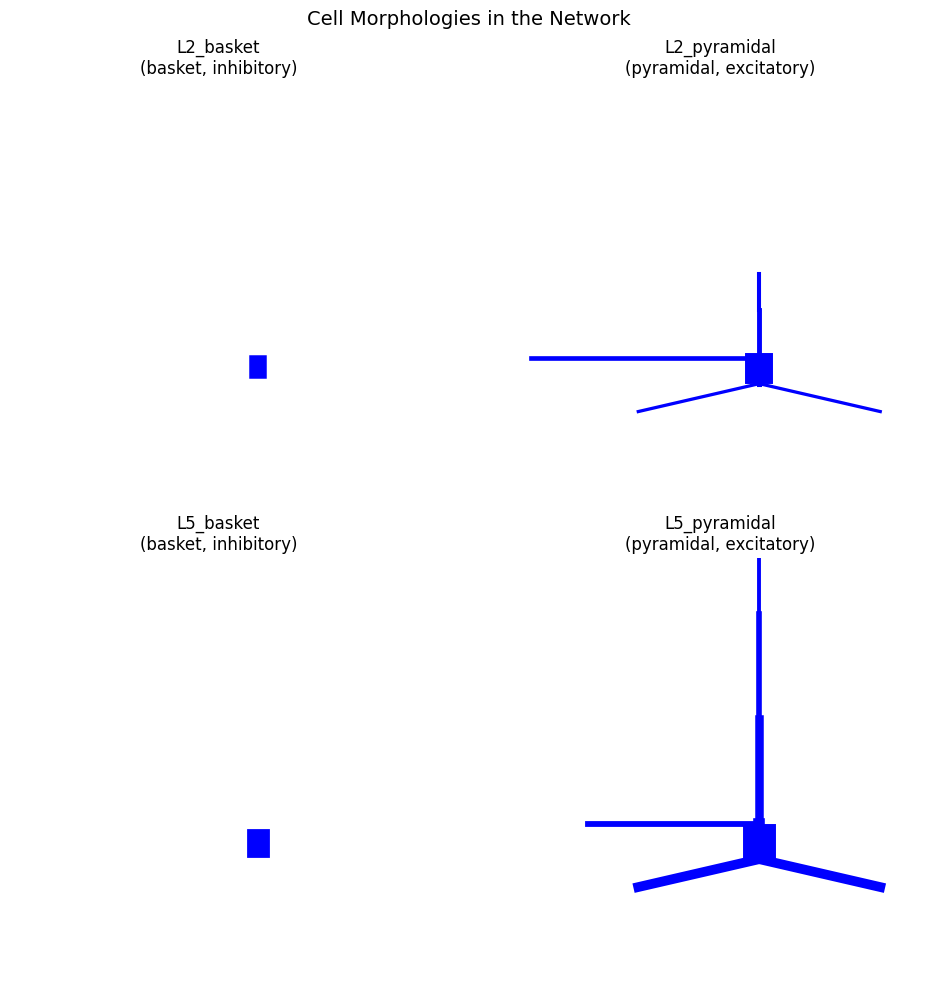

In [7]:
# Using the meta-data data to create annotation data to compare the morphologies of different cell types
fig = plt.figure(figsize=(14, 10))

for idx, (cell_name, cell_data) in enumerate(net.cell_types.items()):
    ax = fig.add_subplot(2, 2, idx + 1, projection='3d')  # Create 3D subplot
    cell_obj = cell_data["cell_object"]
    cell_obj.plot_morphology(ax=ax, show=False)
    ax.set_title(f'{cell_name}\n({cell_data["cell_metadata"]["morpho_type"]}, '
                 f'{cell_data["cell_metadata"]["electro_type"]})')
    
plt.suptitle('Cell Morphologies in the Network', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

In [8]:
# what about stuff like doing complex Filtering, when we need to use multiple criteria

# An exanple Find excitatory cells in layer 2
l2_excitatory = net.filter_cell_types(layer='2', electro_type='excitatory')
print(f"Layer 2 excitatory cells: {l2_excitatory}")

# Get properties of this filtered population
if l2_excitatory:
    cell_type = l2_excitatory[0]
    metadata = net.cell_types[cell_type]['cell_metadata']
    cell_count = len(net.pos_dict[cell_type])
    
    print(f"\nProperties of {cell_type}:")
    print(f"  Cell count: {cell_count}")
    print(f"  Morphology: {metadata['morpho_type']}")
    print(f"  Contributes to dipole: {metadata['measure_dipole']}")

# Another example cells that don't contribute to dipole
inhibitory_non_dipole = net.filter_cell_types(
    electro_type='inhibitory',
    measure_dipole=False
)
print(f"\nInhibitory non-dipole cells: {inhibitory_non_dipole}")

Layer 2 excitatory cells: ['L2_pyramidal']

Properties of L2_pyramidal:
  Cell count: 100
  Morphology: pyramidal
  Contributes to dipole: True

Inhibitory non-dipole cells: ['L2_basket', 'L5_basket']


In [9]:
# Examining Conductances Through Metadata
# You can access conductance parameters for cells identified through metadata filtering.

# Use metadata to find a pyramidal cell, then examine its conductances
pyramidal_cells = net.filter_cell_types(morpho_type='pyramidal')
example_pyramidal = pyramidal_cells[0]  # Take first pyramidal type

print(f"Conductances in {example_pyramidal}:")
print("="*60)

cell_obj = net.cell_types[example_pyramidal]['cell_object']

# Soma conductances as an example
if 'soma' in cell_obj.sections:
    soma_mechs = cell_obj.sections['soma'].mechs
    print("\nSoma ion channels:")
    for mech_name, mech_params in soma_mechs.items():
        conductances = {k: v for k, v in mech_params.items() 
                       if 'gbar' in k or 'gkbar' in k or 'gnabar' in k}
        if conductances:
            print(f"  {mech_name}: {conductances}")

# A dendritic section as an example
if 'apical_tuft' in cell_obj.sections:
    tuft_mechs = cell_obj.sections['apical_tuft'].mechs
    if tuft_mechs:
        print("\nApical tuft ion channels:")
        for mech_name, mech_params in tuft_mechs.items():
            conductances = {k: v for k, v in mech_params.items() if 'gbar' in k}
            if conductances:
                print(f"  {mech_name}: {conductances}")

Conductances in L2_pyramidal:

Soma ion channels:
  km: {'gbar_km': 250.0}
  hh2: {'gkbar_hh2': 0.01, 'gnabar_hh2': 0.18}

Apical tuft ion channels:
  km: {'gbar_km': 250.0}


Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /home/zybander/projs/openSource/final_fresh/hnn-core/hnn_core/mod/x86_64/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...


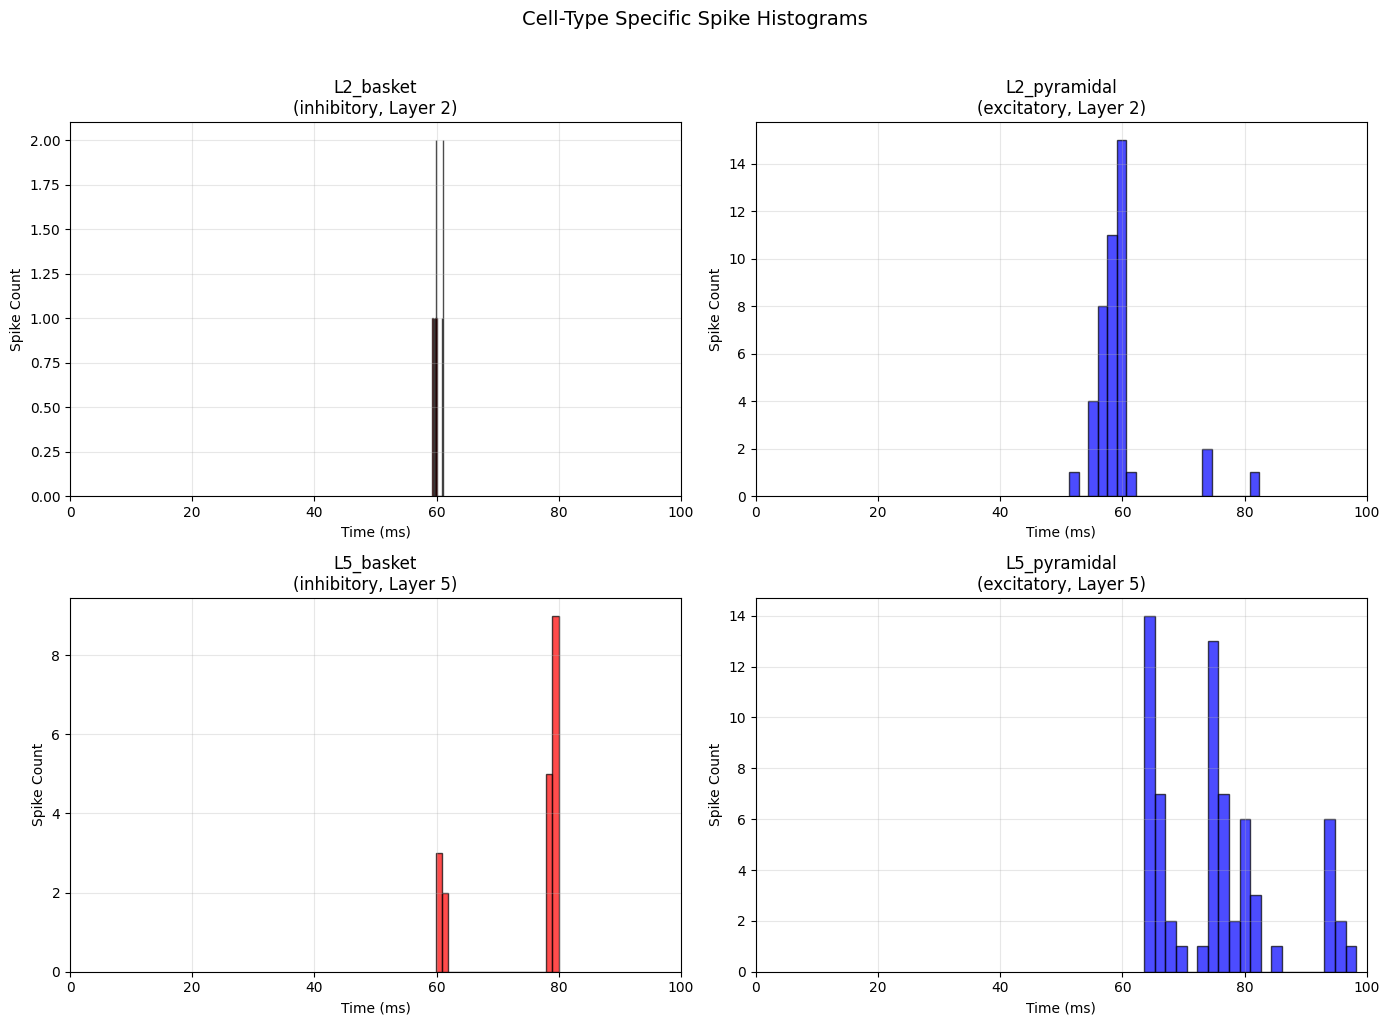

In [10]:
# Add a simple evoked drive to see cell-type specific responses
weights_ampa = {'L2_pyramidal': 0.001, 'L5_pyramidal': 0.001,
                'L2_basket': 0.0005, 'L5_basket': 0.0005}

net.add_evoked_drive(
    'test_drive', 
    mu=50.0, 
    sigma=5.0, 
    numspikes=1,
    weights_ampa=weights_ampa,
    location='proximal',
    event_seed=42
)

dpls = simulate_dipole(net, tstop=100., n_trials=1)

# from the above what if we want to see the Cell-Type Specific Activity Patterns
# firing patterns by cell type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# spike data
spike_times = net.cell_response.spike_times[0]
spike_gids = net.cell_response.spike_gids[0]
spike_types = net.cell_response.spike_types[0]

# histograms for each cell type
for idx, cell_type in enumerate(net.cell_types.keys()):
    ax = axes[idx // 2, idx % 2]
    
    # Get spikes for this cell type
    cell_mask = np.array([st == cell_type for st in spike_types])
    cell_spike_times = np.array(spike_times)[cell_mask]
    
    # Determine if excitatory or inhibitory
    metadata = net.cell_types[cell_type]["cell_metadata"]
    color = 'blue' if metadata["electro_type"] == "excitatory" else 'red'
    
    # Plot histogram
    if len(cell_spike_times) > 0:
        ax.hist(cell_spike_times, bins=20, color=color, alpha=0.7, edgecolor='black')
    
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Spike Count')
    ax.set_title(f'{cell_type}\n({metadata["electro_type"]}, Layer {metadata["layer"]})')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 100])

plt.suptitle('Cell-Type Specific Spike Histograms', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [11]:
# Tracking Weight Changes with Metadata Filters
# You can use metadata to identify and track changes in specific connection types.

# Create modified network
net_modified = net.copy()
net_modified.update_weights(e_e=2.0)

# Use metadata to identify excitatory cells
excitatory = net.filter_cell_types(electro_type='excitatory')

# Check one specific connection as example
src = 'L5_pyramidal'  # An excitatory cell
target = 'L5_pyramidal'  # Another excitatory cell

print(f"Weight changes for {src} → {target}:")
print("-"*50)

# Find and compare this connection
for idx, conn in enumerate(net.connectivity):
    if (conn['src_type'] == src and 
        conn['target_type'] == target and 
        conn['loc'] == 'proximal' and
        conn['receptor'] == 'nmda'):  # Check specific receptor
        
        orig_weight = conn['nc_dict']['A_weight'] * conn['nc_dict'].get('gain', 1.0)
        mod_weight = (net_modified.connectivity[idx]['nc_dict']['A_weight'] * 
                     net_modified.connectivity[idx]['nc_dict'].get('gain', 1.0))
        
        print(f"NMDA receptor:")
        print(f"  Original weight: {orig_weight:.6f} µS")
        print(f"  Modified weight: {mod_weight:.6f} µS")
        print(f"  Change: {((mod_weight/orig_weight - 1) * 100):+.1f}%")
        break

Weight changes for L5_pyramidal → L5_pyramidal:
--------------------------------------------------
NMDA receptor:
  Original weight: 0.000500 µS
  Modified weight: 0.001000 µS
  Change: +100.0%


In [12]:
# Using metadata filters to create a concise network summary.
print("NETWORK SUMMARY USING METADATA FILTERS")
print("="*60)

# Count cells by physiological type
excitatory_count = sum(len(net.pos_dict[ct]) 
                       for ct in net.filter_cell_types(electro_type='excitatory'))
inhibitory_count = sum(len(net.pos_dict[ct]) 
                       for ct in net.filter_cell_types(electro_type='inhibitory'))

print(f"Total excitatory cells: {excitatory_count}")
print(f"Total inhibitory cells: {inhibitory_count}")
print(f"E/I ratio: {excitatory_count/inhibitory_count:.2f}")

# Cells contributing to dipole
dipole_cells = net.filter_cell_types(measure_dipole=True)
dipole_count = sum(len(net.pos_dict[ct]) for ct in dipole_cells)
print(f"\nCells contributing to dipole: {dipole_count}")
print(f"Cell types: {dipole_cells}")

# Layer distribution
for layer in ['2', '5']:
    layer_cells = net.filter_cell_types(layer=layer)
    layer_count = sum(len(net.pos_dict[ct]) for ct in layer_cells)
    print(f"\nLayer {layer}: {layer_count} cells")
    print(f"  Types: {layer_cells}")

NETWORK SUMMARY USING METADATA FILTERS
Total excitatory cells: 200
Total inhibitory cells: 70
E/I ratio: 2.86

Cells contributing to dipole: 200
Cell types: ['L2_pyramidal', 'L5_pyramidal']

Layer 2: 135 cells
  Types: ['L2_basket', 'L2_pyramidal']

Layer 5: 135 cells
  Types: ['L5_basket', 'L5_pyramidal']
